# Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Read the data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
data

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Make the proper name of columns

In [3]:
data.rename(columns={'LP001002':'Loan_ID',\
                    'Male':'Gender',\
                    'No':'Married',\
                    '0':'Dependents',\
                    'Graduate':'Education',\
                    'No.1':'Self_Employed',\
                    '5849':'Applicant Income',\
                    '0.1':'CoapplicantIncome',\
                    'Unnamed: 8':'Loan_Amount',\
                    '360':'Loan_Amount_Term',\
                    '1':'Credit History',\
                    'Urban':'Property_Area',\
                    'Y':'Loan_Status'},\
           inplace=True)

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset contains the details of Loan prediction case study in this dataset numerical and categorical data is present. Here Loan_status is our target/output veriable, Loan_status which contains categorical so it will be termed as a classification problem where we need to predict the several Loan_status using the classification problem.

# EDA (Exploratory Data Analysis)

In [5]:
# check the shape of dataset
data.shape

(613, 13)

In [6]:
# Check the columns 
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant Income', 'CoapplicantIncome', 'Loan_Amount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant Income',
 'CoapplicantIncome',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit History',
 'Property_Area',
 'Loan_Status']

In [8]:
# check the null values 
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# drop the id columns 
data.drop('Loan_ID', axis=1, inplace=True)

In [10]:
# check the unique values of columns 
data.nunique().to_frame("No of unique values")

,No of unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
Applicant Income,504
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10
Credit History,2


In [11]:
# check the information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            610 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      581 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [12]:
# check the data type of the data 
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
# check the unique value of Loan_status columns 
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

<Axes: >

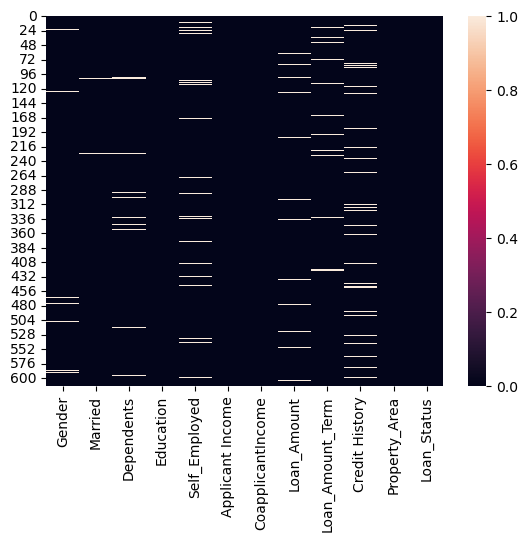

In [14]:
sns.heatmap(data.isnull())

Check the null value using heatmap so we are find here lots of null value present in this dataset 

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Loan_Amount'] = data['Loan_Amount'].fillna(data['Loan_Amount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit History'] = data['Credit History'].fillna(data['Credit History'].mode()[0])

Fill the null value 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    object 
 1   Married            613 non-null    object 
 2   Dependents         613 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      613 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        613 non-null    float64
 8   Loan_Amount_Term   613 non-null    float64
 9   Credit History     613 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

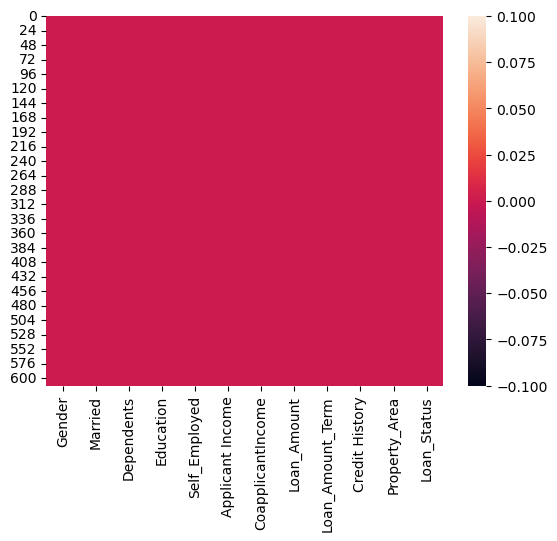

In [18]:
sns.heatmap(data.isnull())

Now its look perfect

In [19]:
data.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,145.507341,342.381729,0.854812
std,6114.004114,2927.903583,84.243415,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,125.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical information of numericcal columns. 

In this dataset we are check all mean standard deviation min 25% 50% 75% and max The summary of the dataset looks not perfect since there is negative/invalid values present.

The Loan_Amount_Term, Applicant Income and CoapplicantIncome columns maximum is very high that means there is right skewness is present.


The counts of all the columns are same which means there are no missing values in the dataset.

In [20]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

Male      501
Female    112
Name: Gender, dtype: int64


Yes    401
No     212
Name: Married, dtype: int64


0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        479
Not Graduate    134
Name: Education, dtype: int64


No     531
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: Applicant Income, Length: 504, dtype: int64


0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    41
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: Loan_Amount, Length: 203, dtype: int64


360.0    525
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan

In [21]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        categorical_col.append(i)
print(" categorical columns :", categorical_col)
print('\n')

numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns: ", numerical_col)

 categorical columns : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns:  ['Applicant Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit History']


There is split the data in two parts categorical and numerical 

# Data visualization

Y    421
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

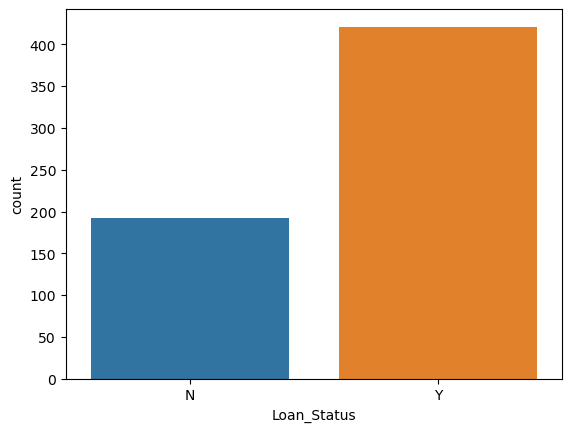

In [22]:
print(data['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=data)

as we see in this Loan_Status data set most of the people have yes 

Male      501
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

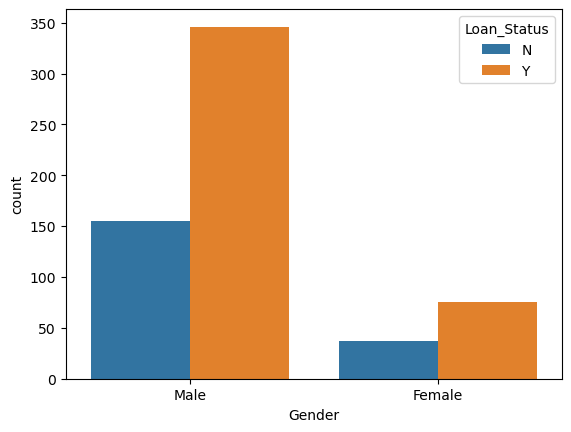

In [23]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender', hue='Loan_Status',data=data)

as we see in this data set Male is ready for loan

0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

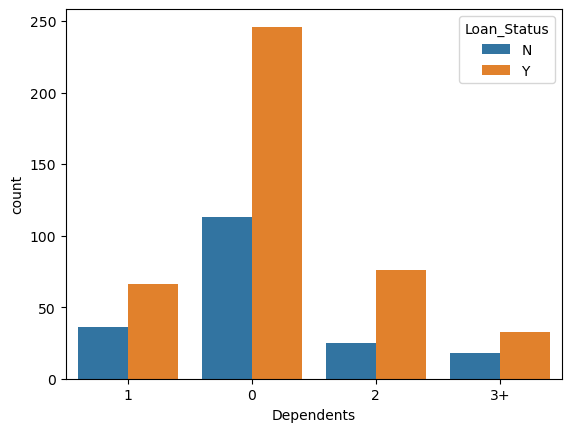

In [24]:
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', hue='Loan_Status',data=data)

as we see in this dataset most of the people not dependent on any others 

Graduate        479
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

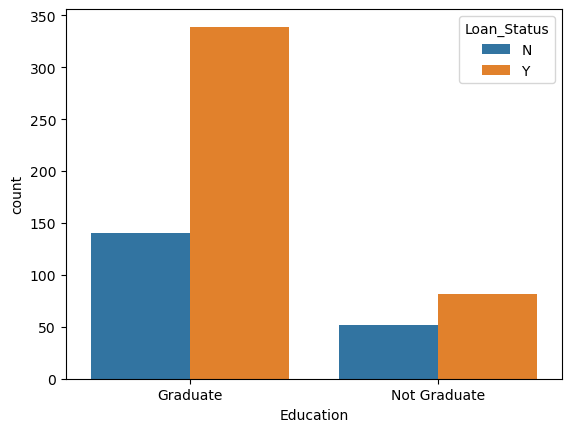

In [25]:
print(data['Education'].value_counts())
sns.countplot(x='Education',hue='Loan_Status', data=data)

as we see in this data set most of the people graduate

No     531
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

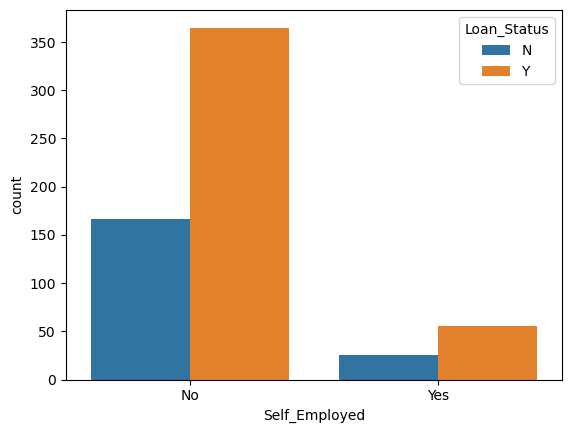

In [26]:
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)

as we see in this dataset most of the people not the self employeed 

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

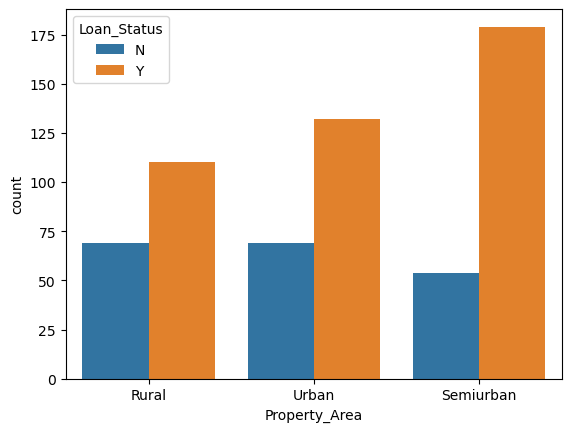

In [27]:
print(data['Property_Area'].value_counts())
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

as we see in this data most of the people lived in semiurban

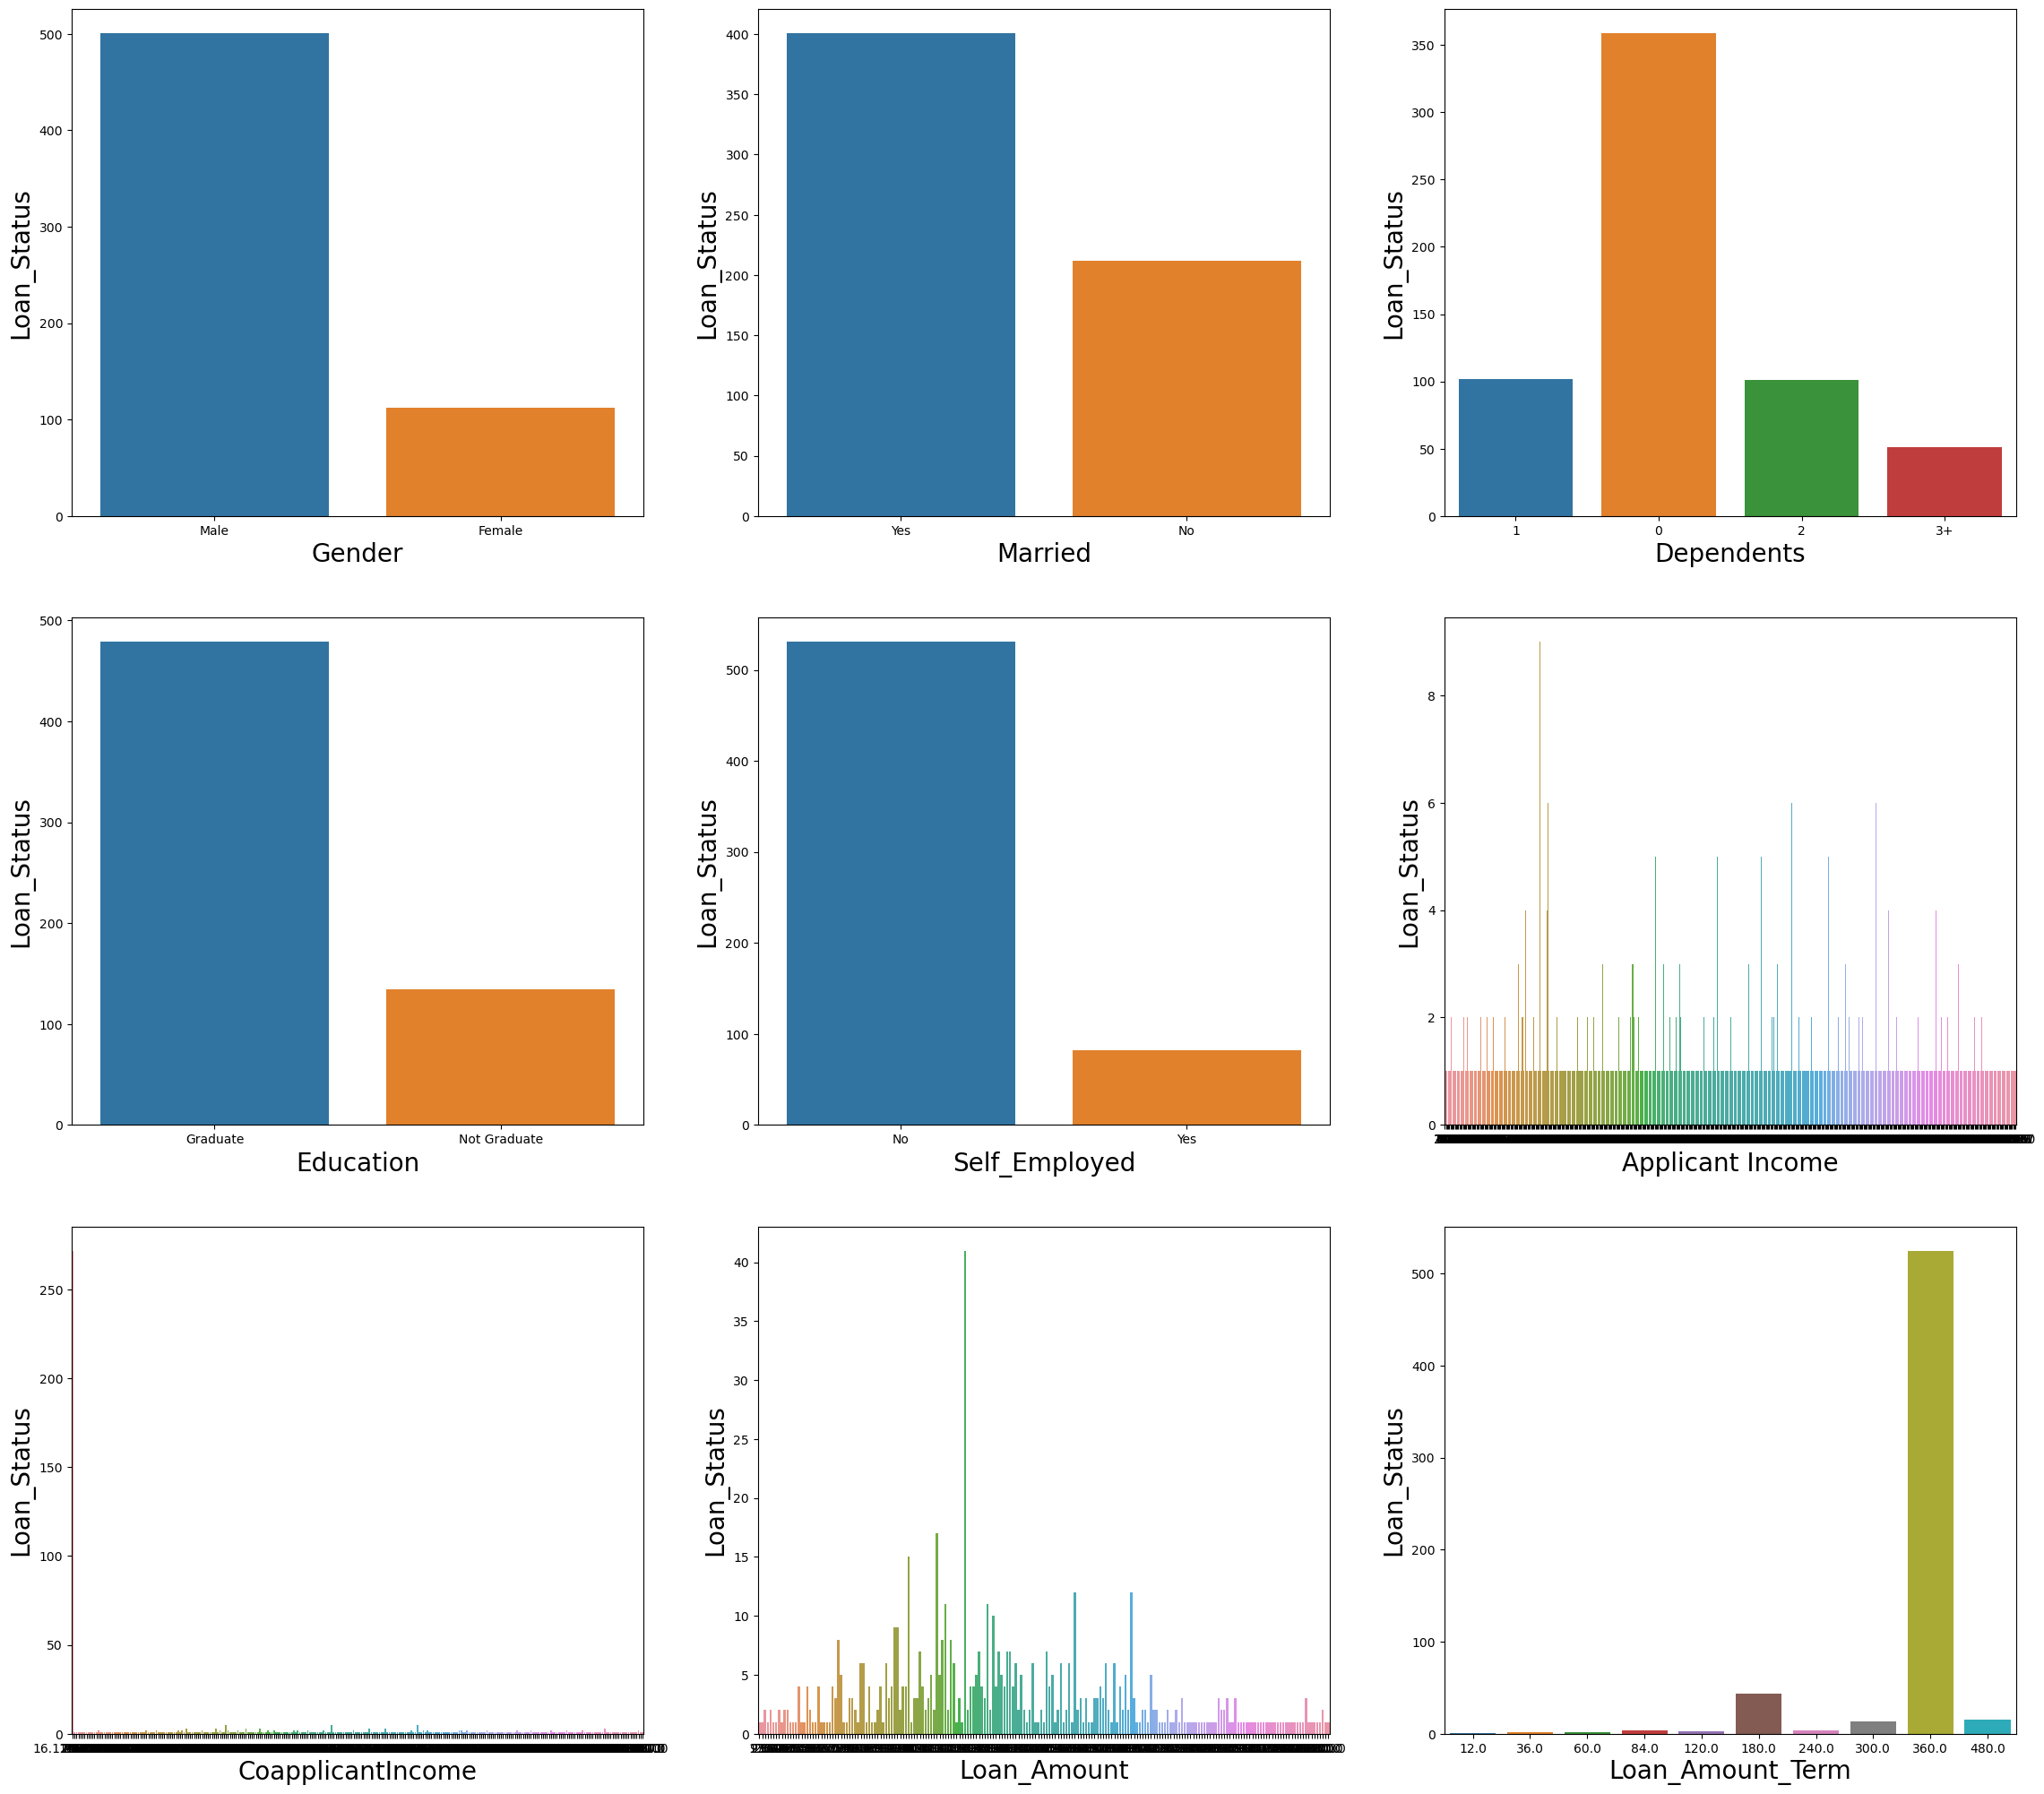

In [28]:
plt.figure(figsize=(28,25), facecolor="white")
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0))
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Loan_Status', fontsize=20)
    plotnumber+=1
plt.show()

check the data in one graph

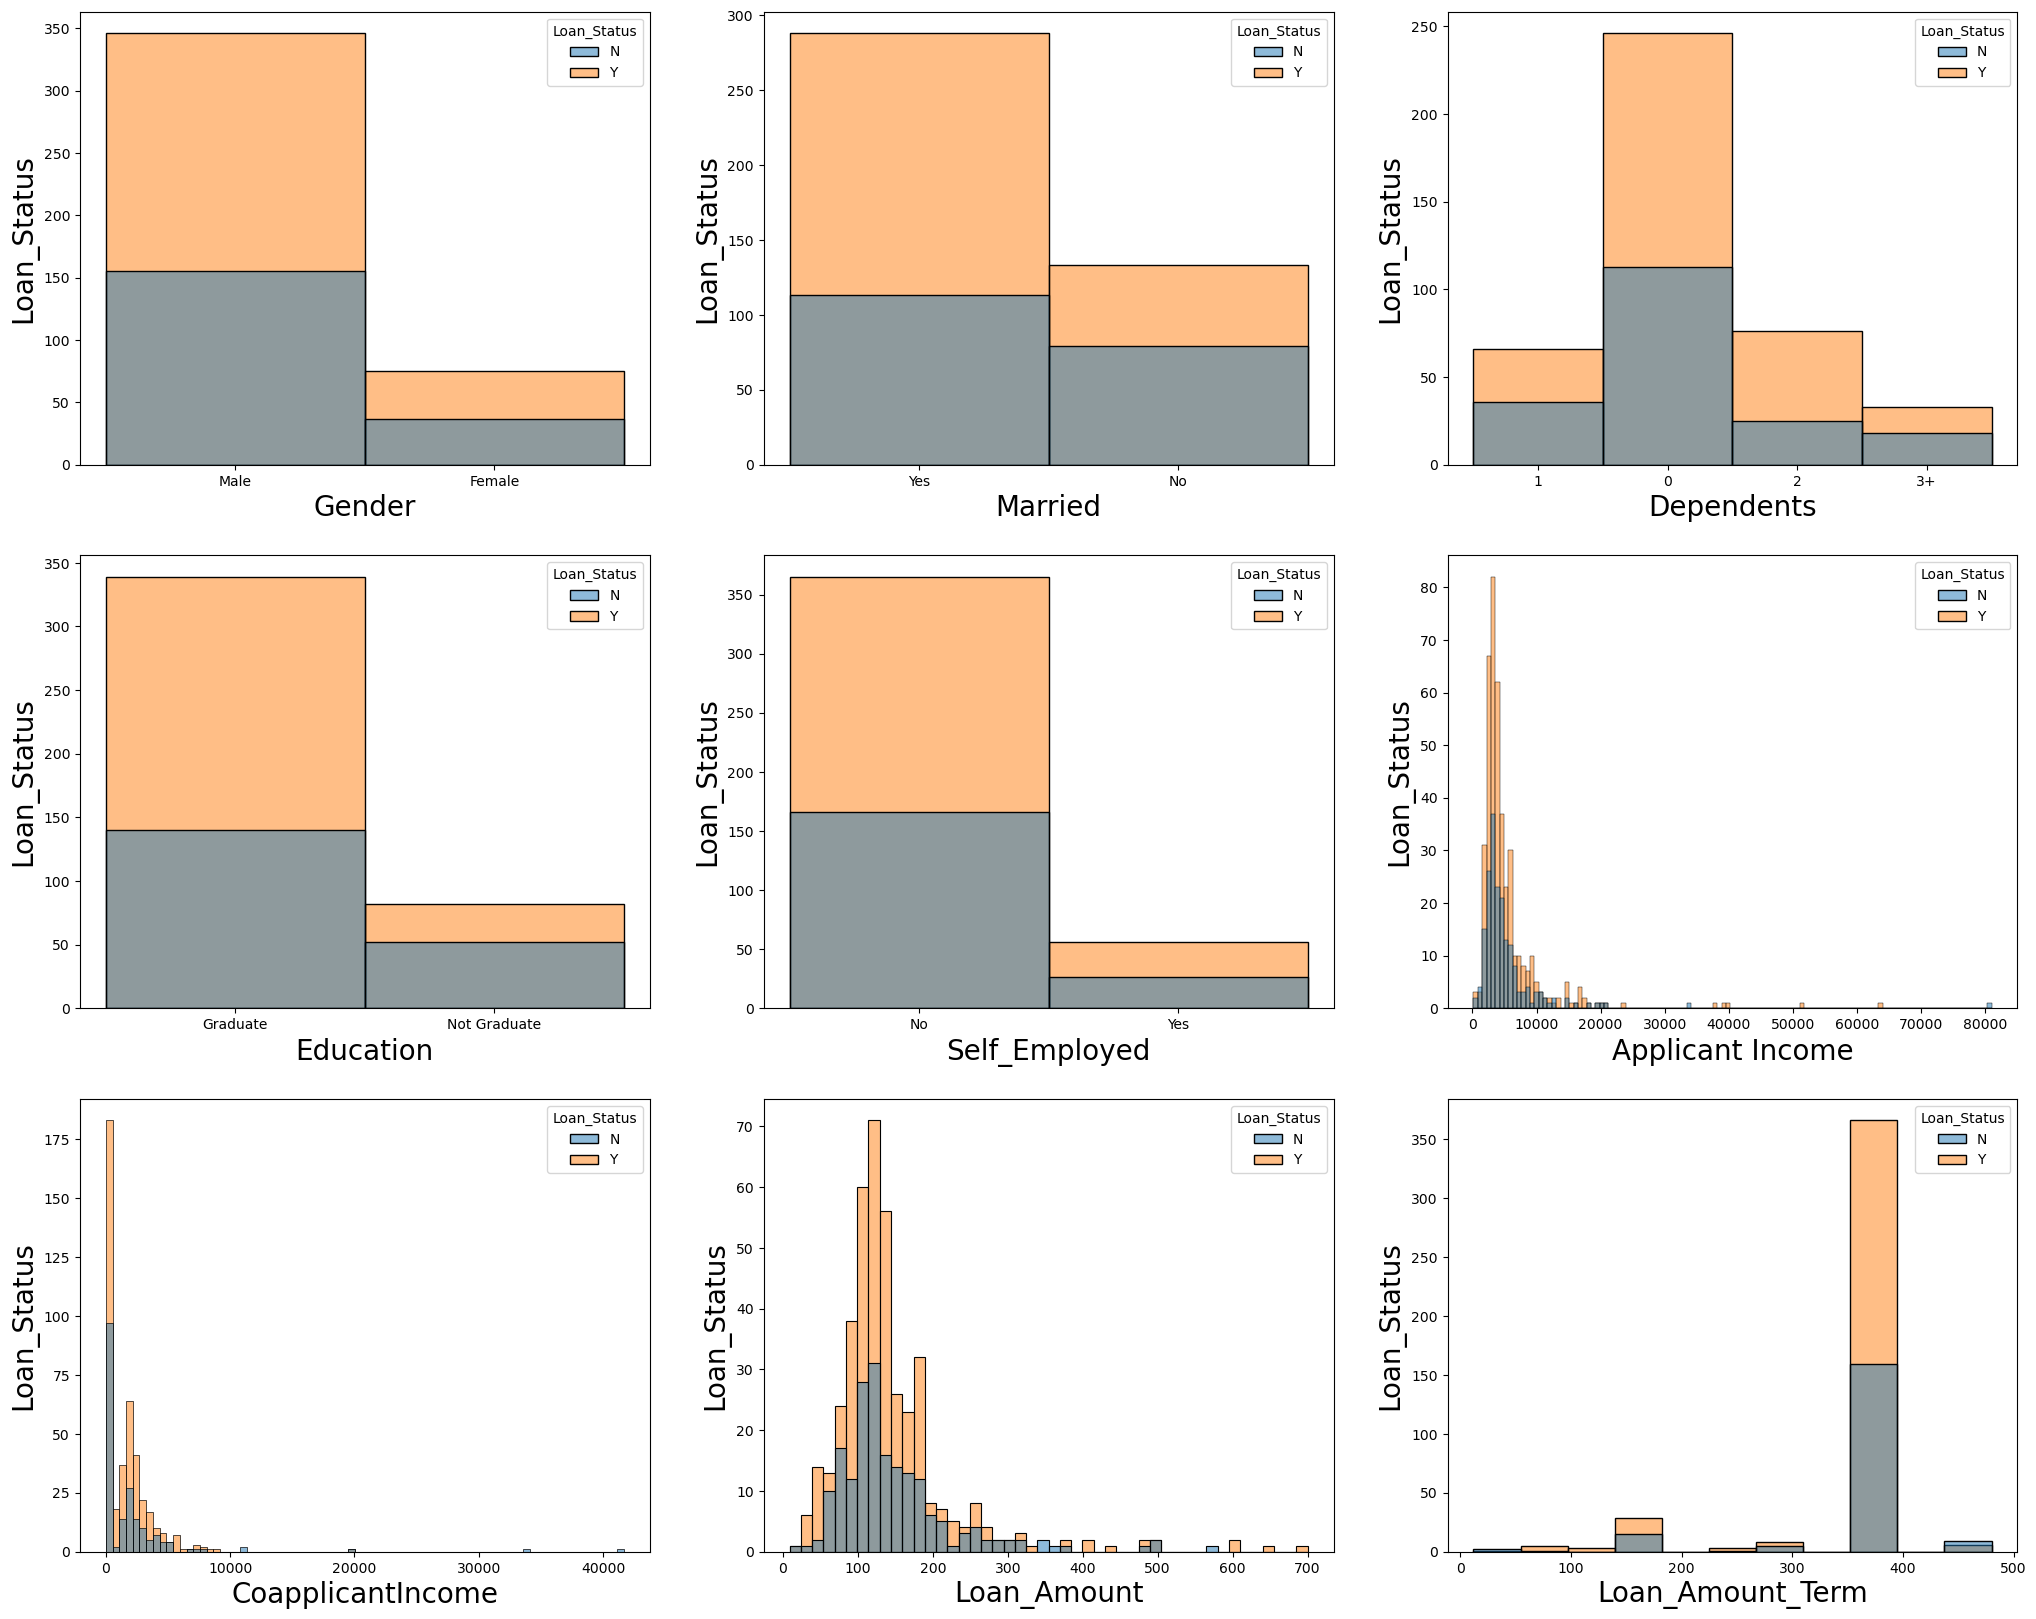

In [29]:
plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column].dropna(axis=0),hue=data.Loan_Status)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Loan_Status', fontsize=20)
    plotnumber+=1
plt.show()

360.0    525
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

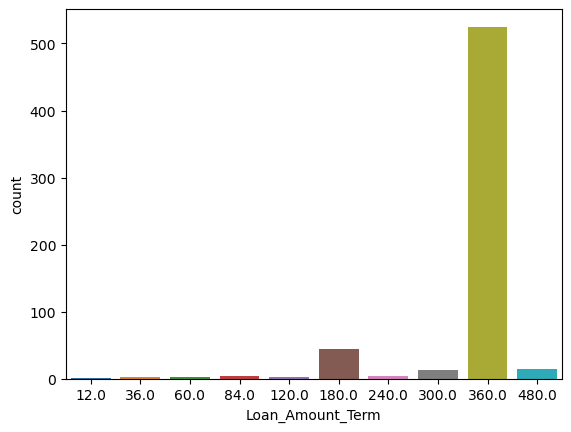

In [30]:
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term',data=data)

as we see in this dataset most of the people have in 360.0 term 

1.0    524
0.0     89
Name: Credit History, dtype: int64


<Axes: xlabel='Credit History', ylabel='count'>

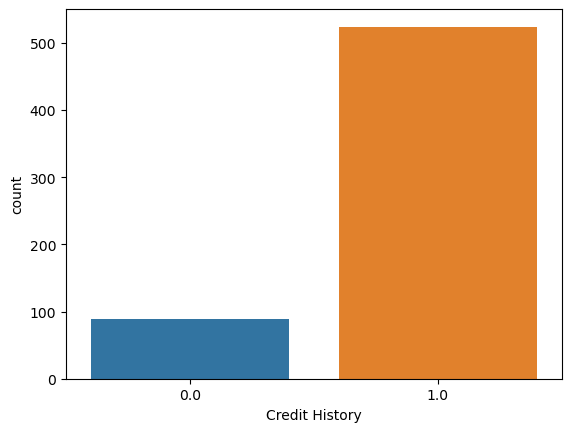

In [31]:
print(data['Credit History'].value_counts())
sns.countplot(x='Credit History', data=data)

as we see in this dataset most of the peoples credit history 1.0 

In [32]:
data.corr()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
Applicant Income,1.000000,-0.116568,0.564779,-0.046567,-0.018667
CoapplicantIncome,-0.116568,1.000000,0.189511,-0.059154,0.011511
Loan_Amount,0.564779,0.189511,1.000000,0.037292,-0.000047
Loan_Amount_Term,-0.046567,-0.059154,0.037292,1.000000,-0.004889
Credit History,-0.018667,0.011511,-0.000047,-0.004889,1.000000


Check the correlation of the dataset 

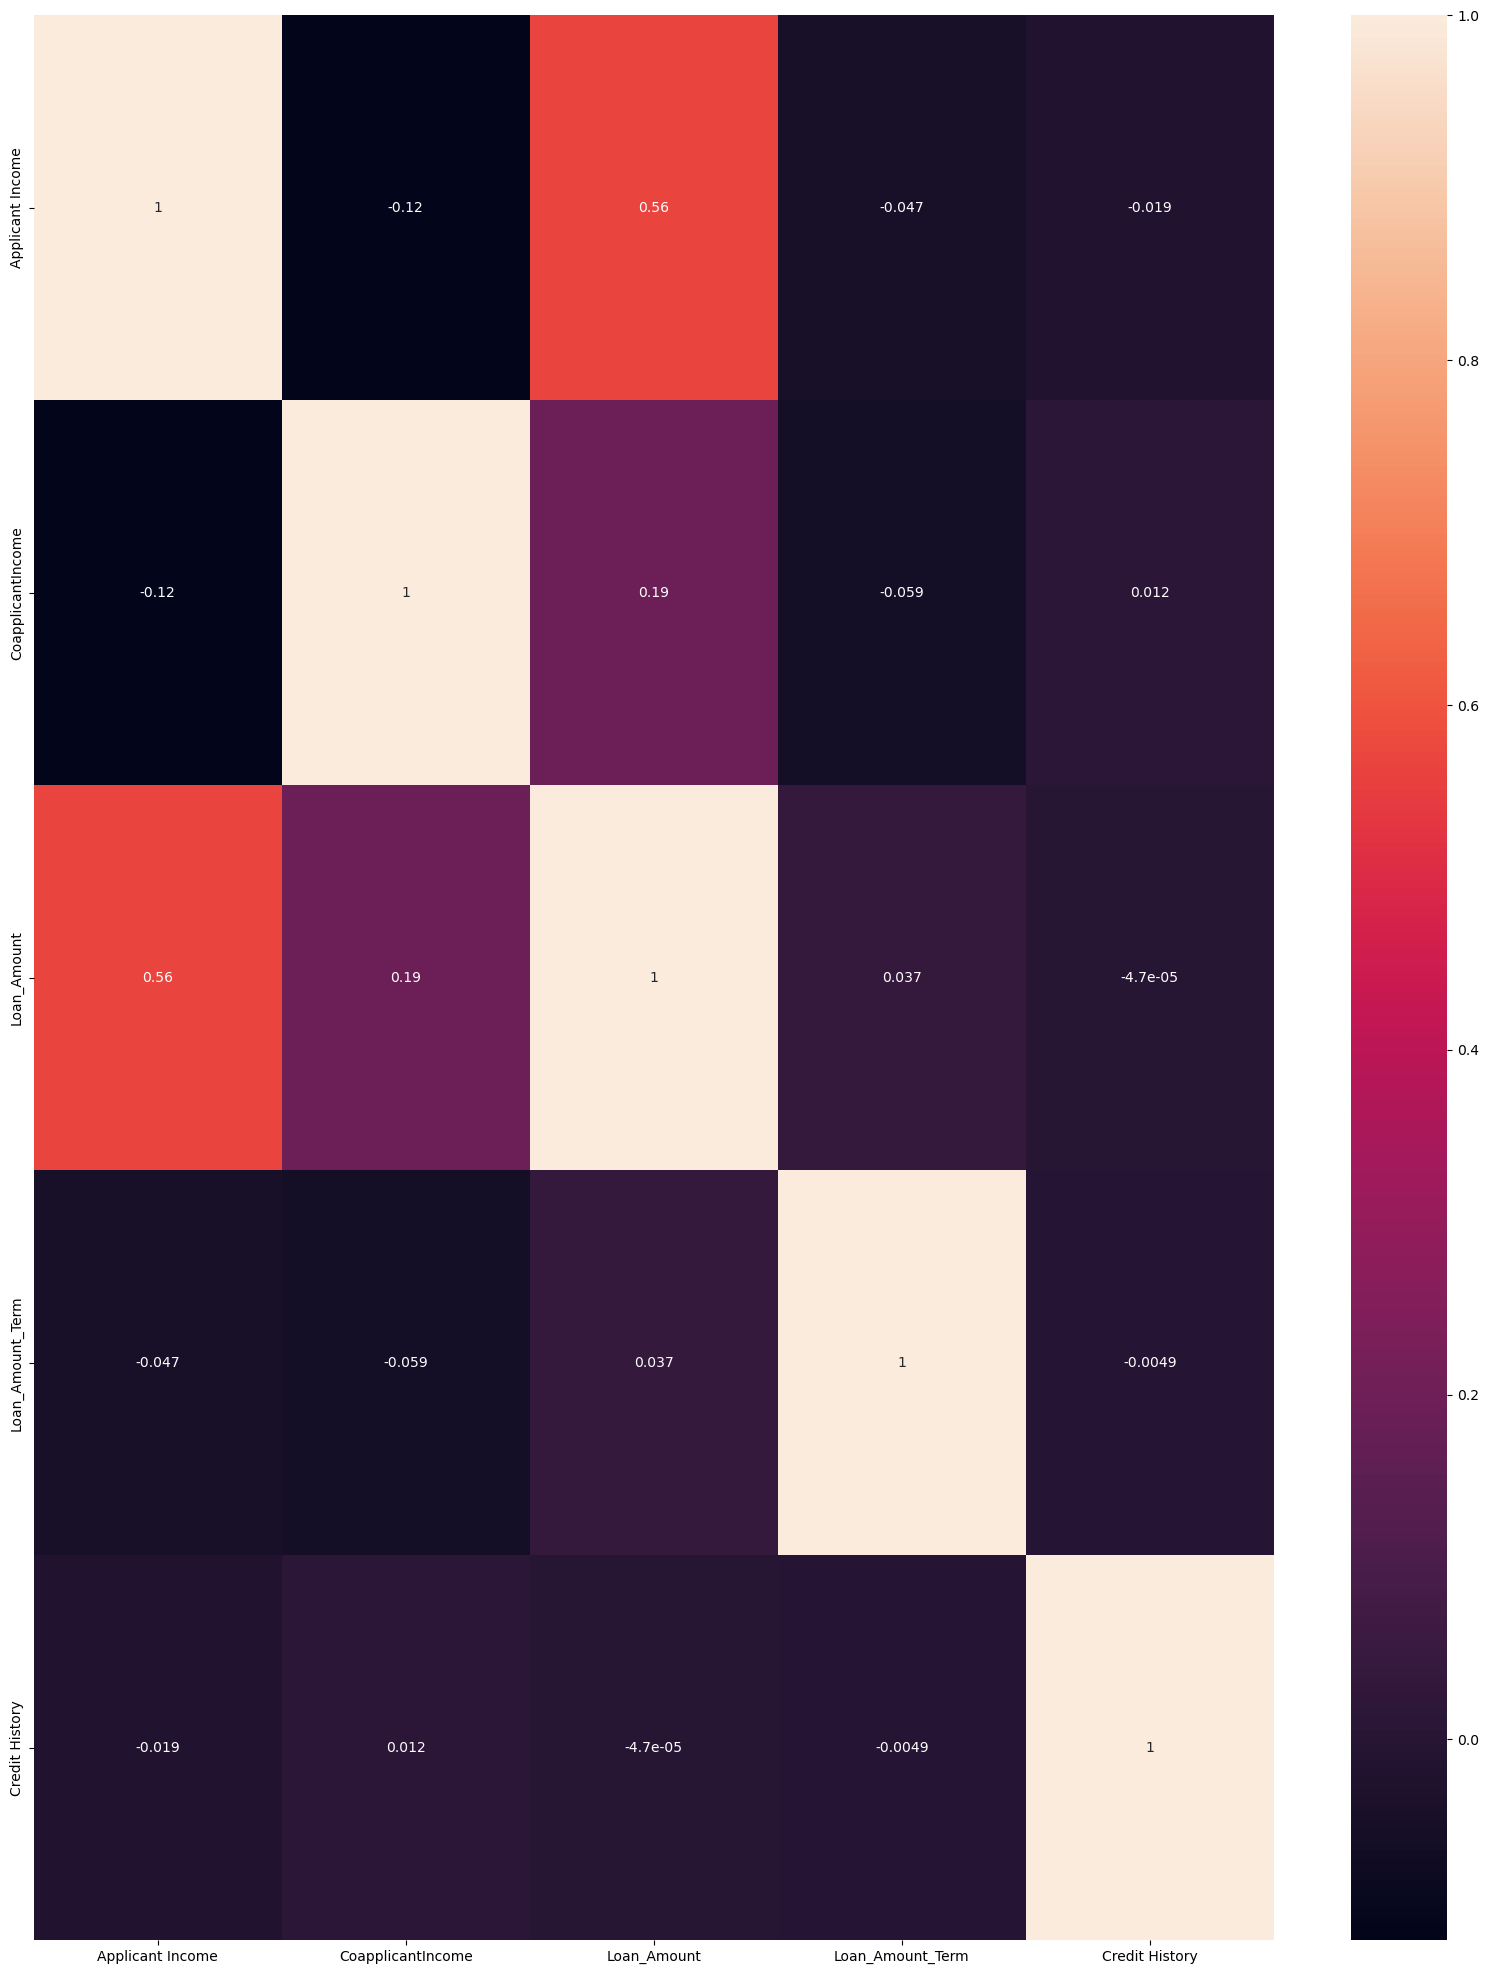

In [33]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True)
plt.show()

in this dataset check the correlation of the dataset using heatmap. so as we see in this data positive correlation 

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
609,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
610,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
611,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


Encoded the data using OrdinalEncoder to make categorical data into numerical data 

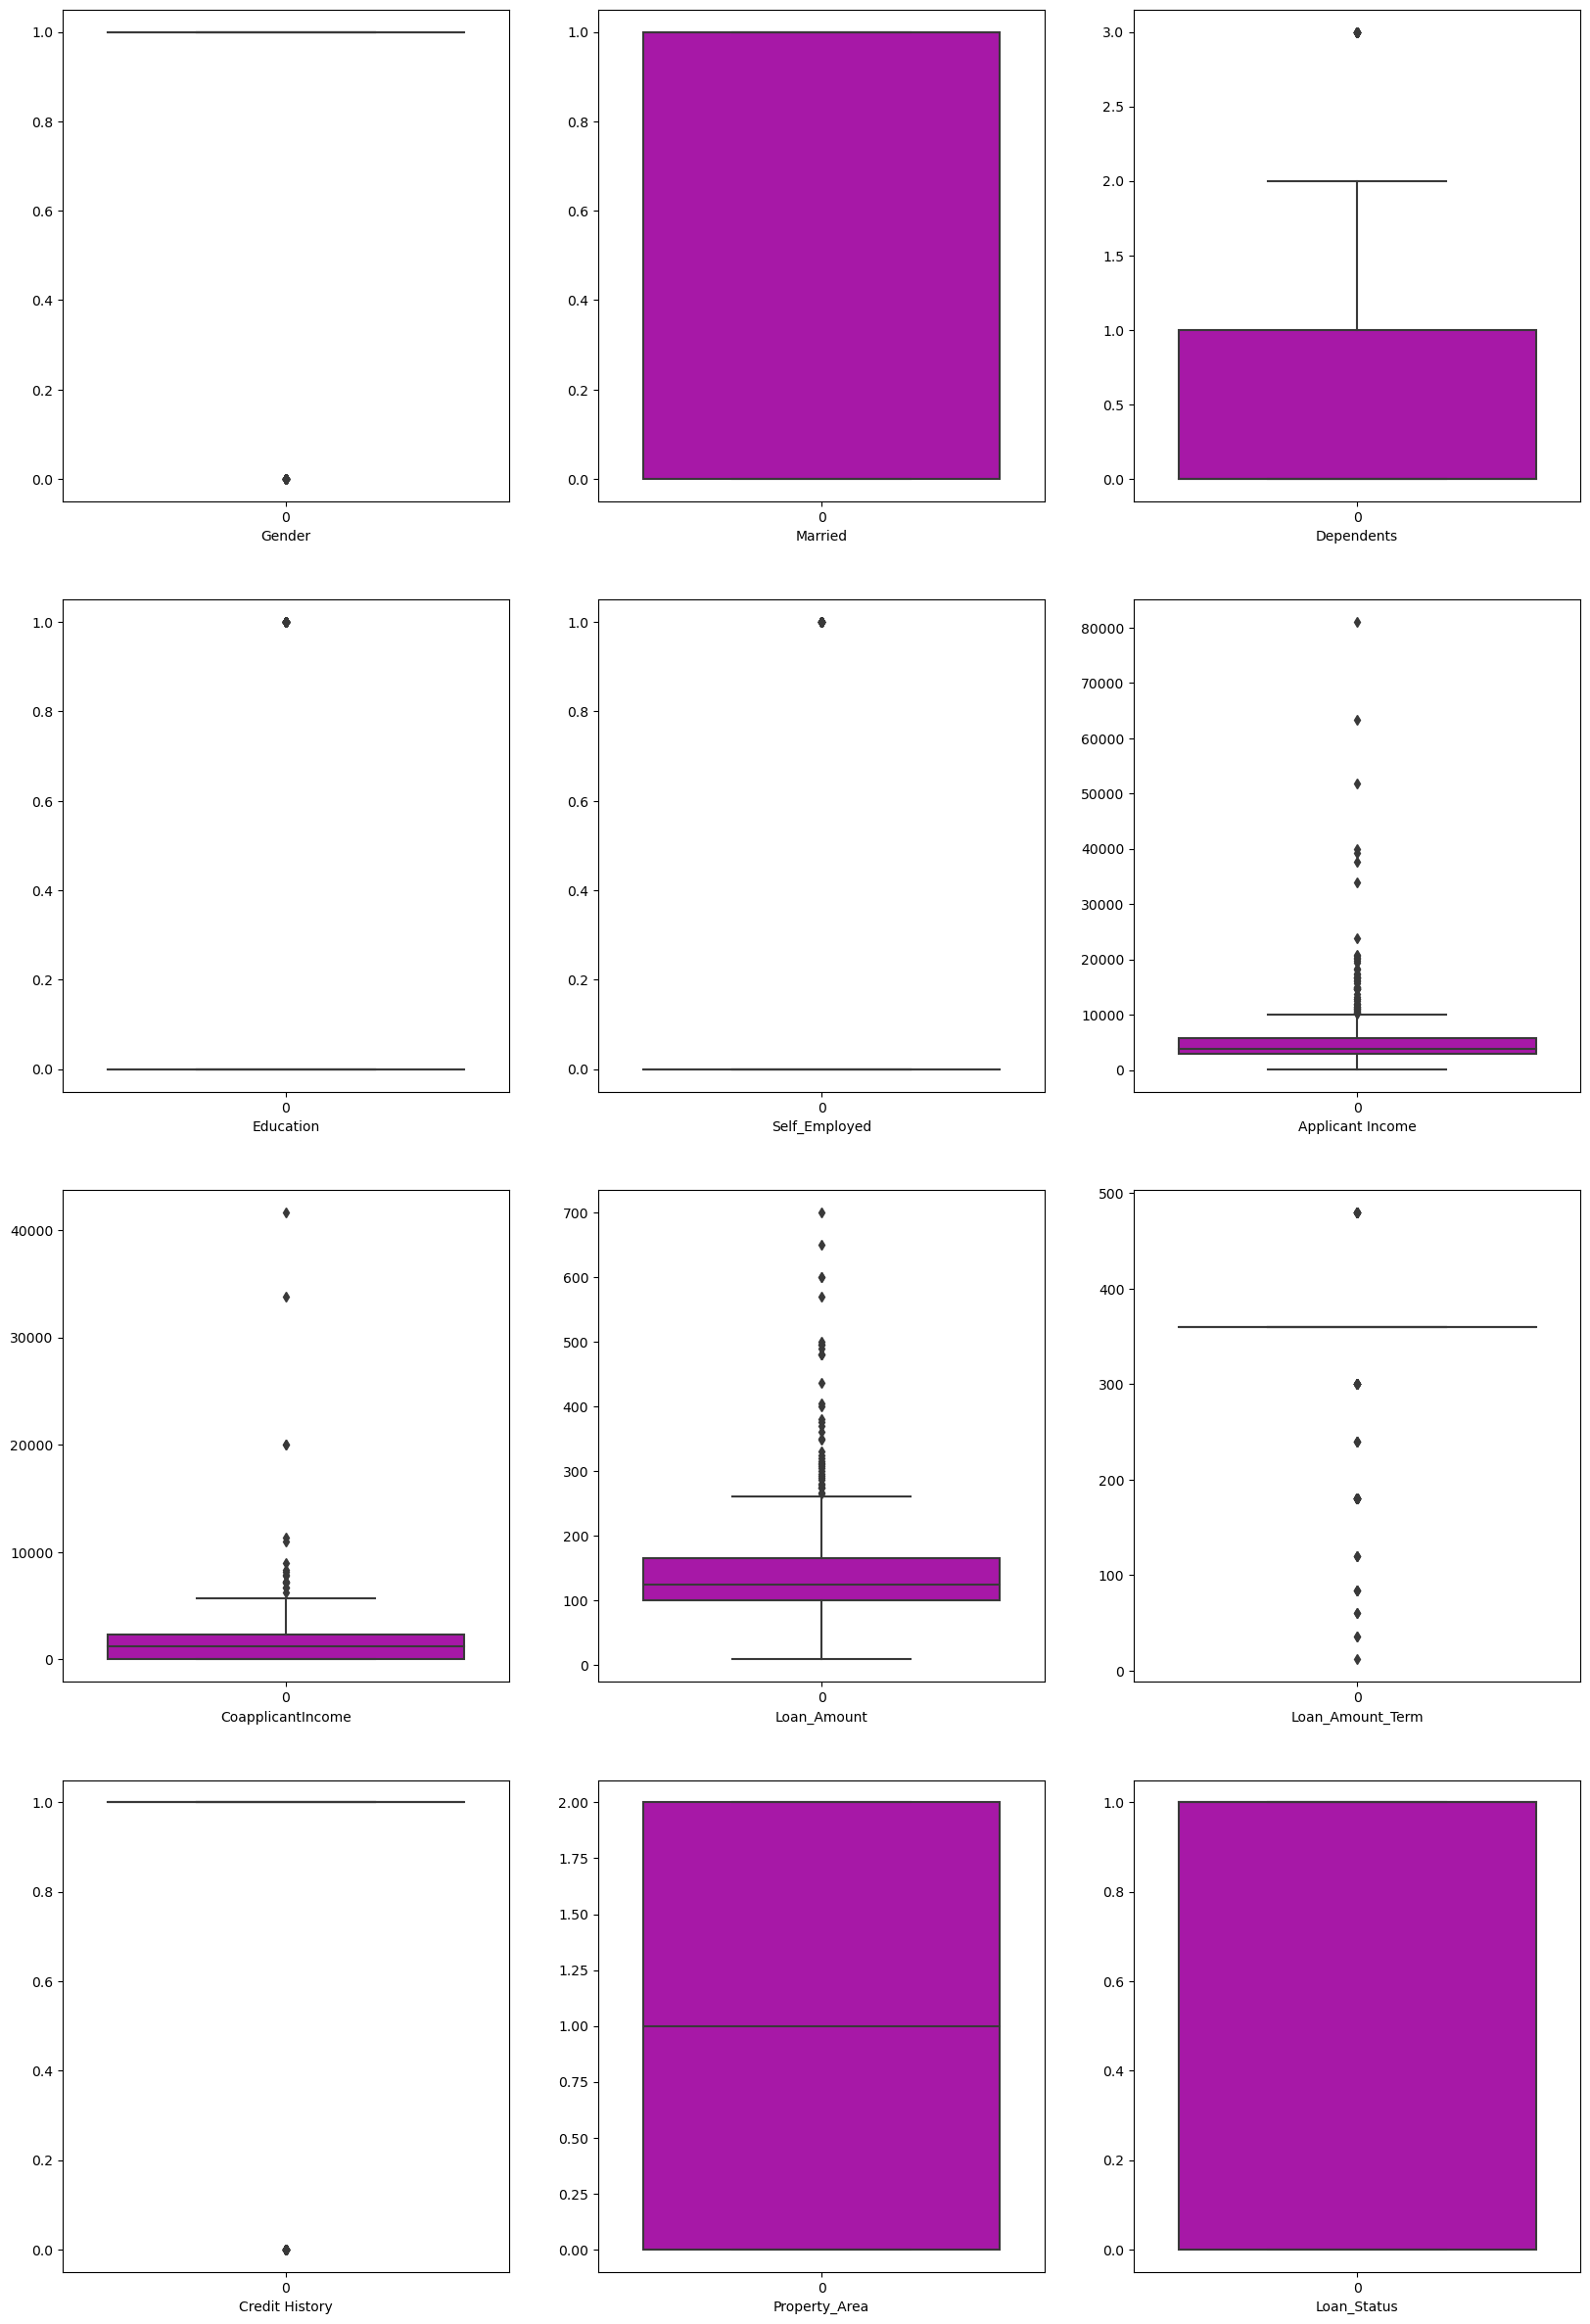

In [36]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

Check the skewness using boxplot. So we see in this dataset skewness is present 

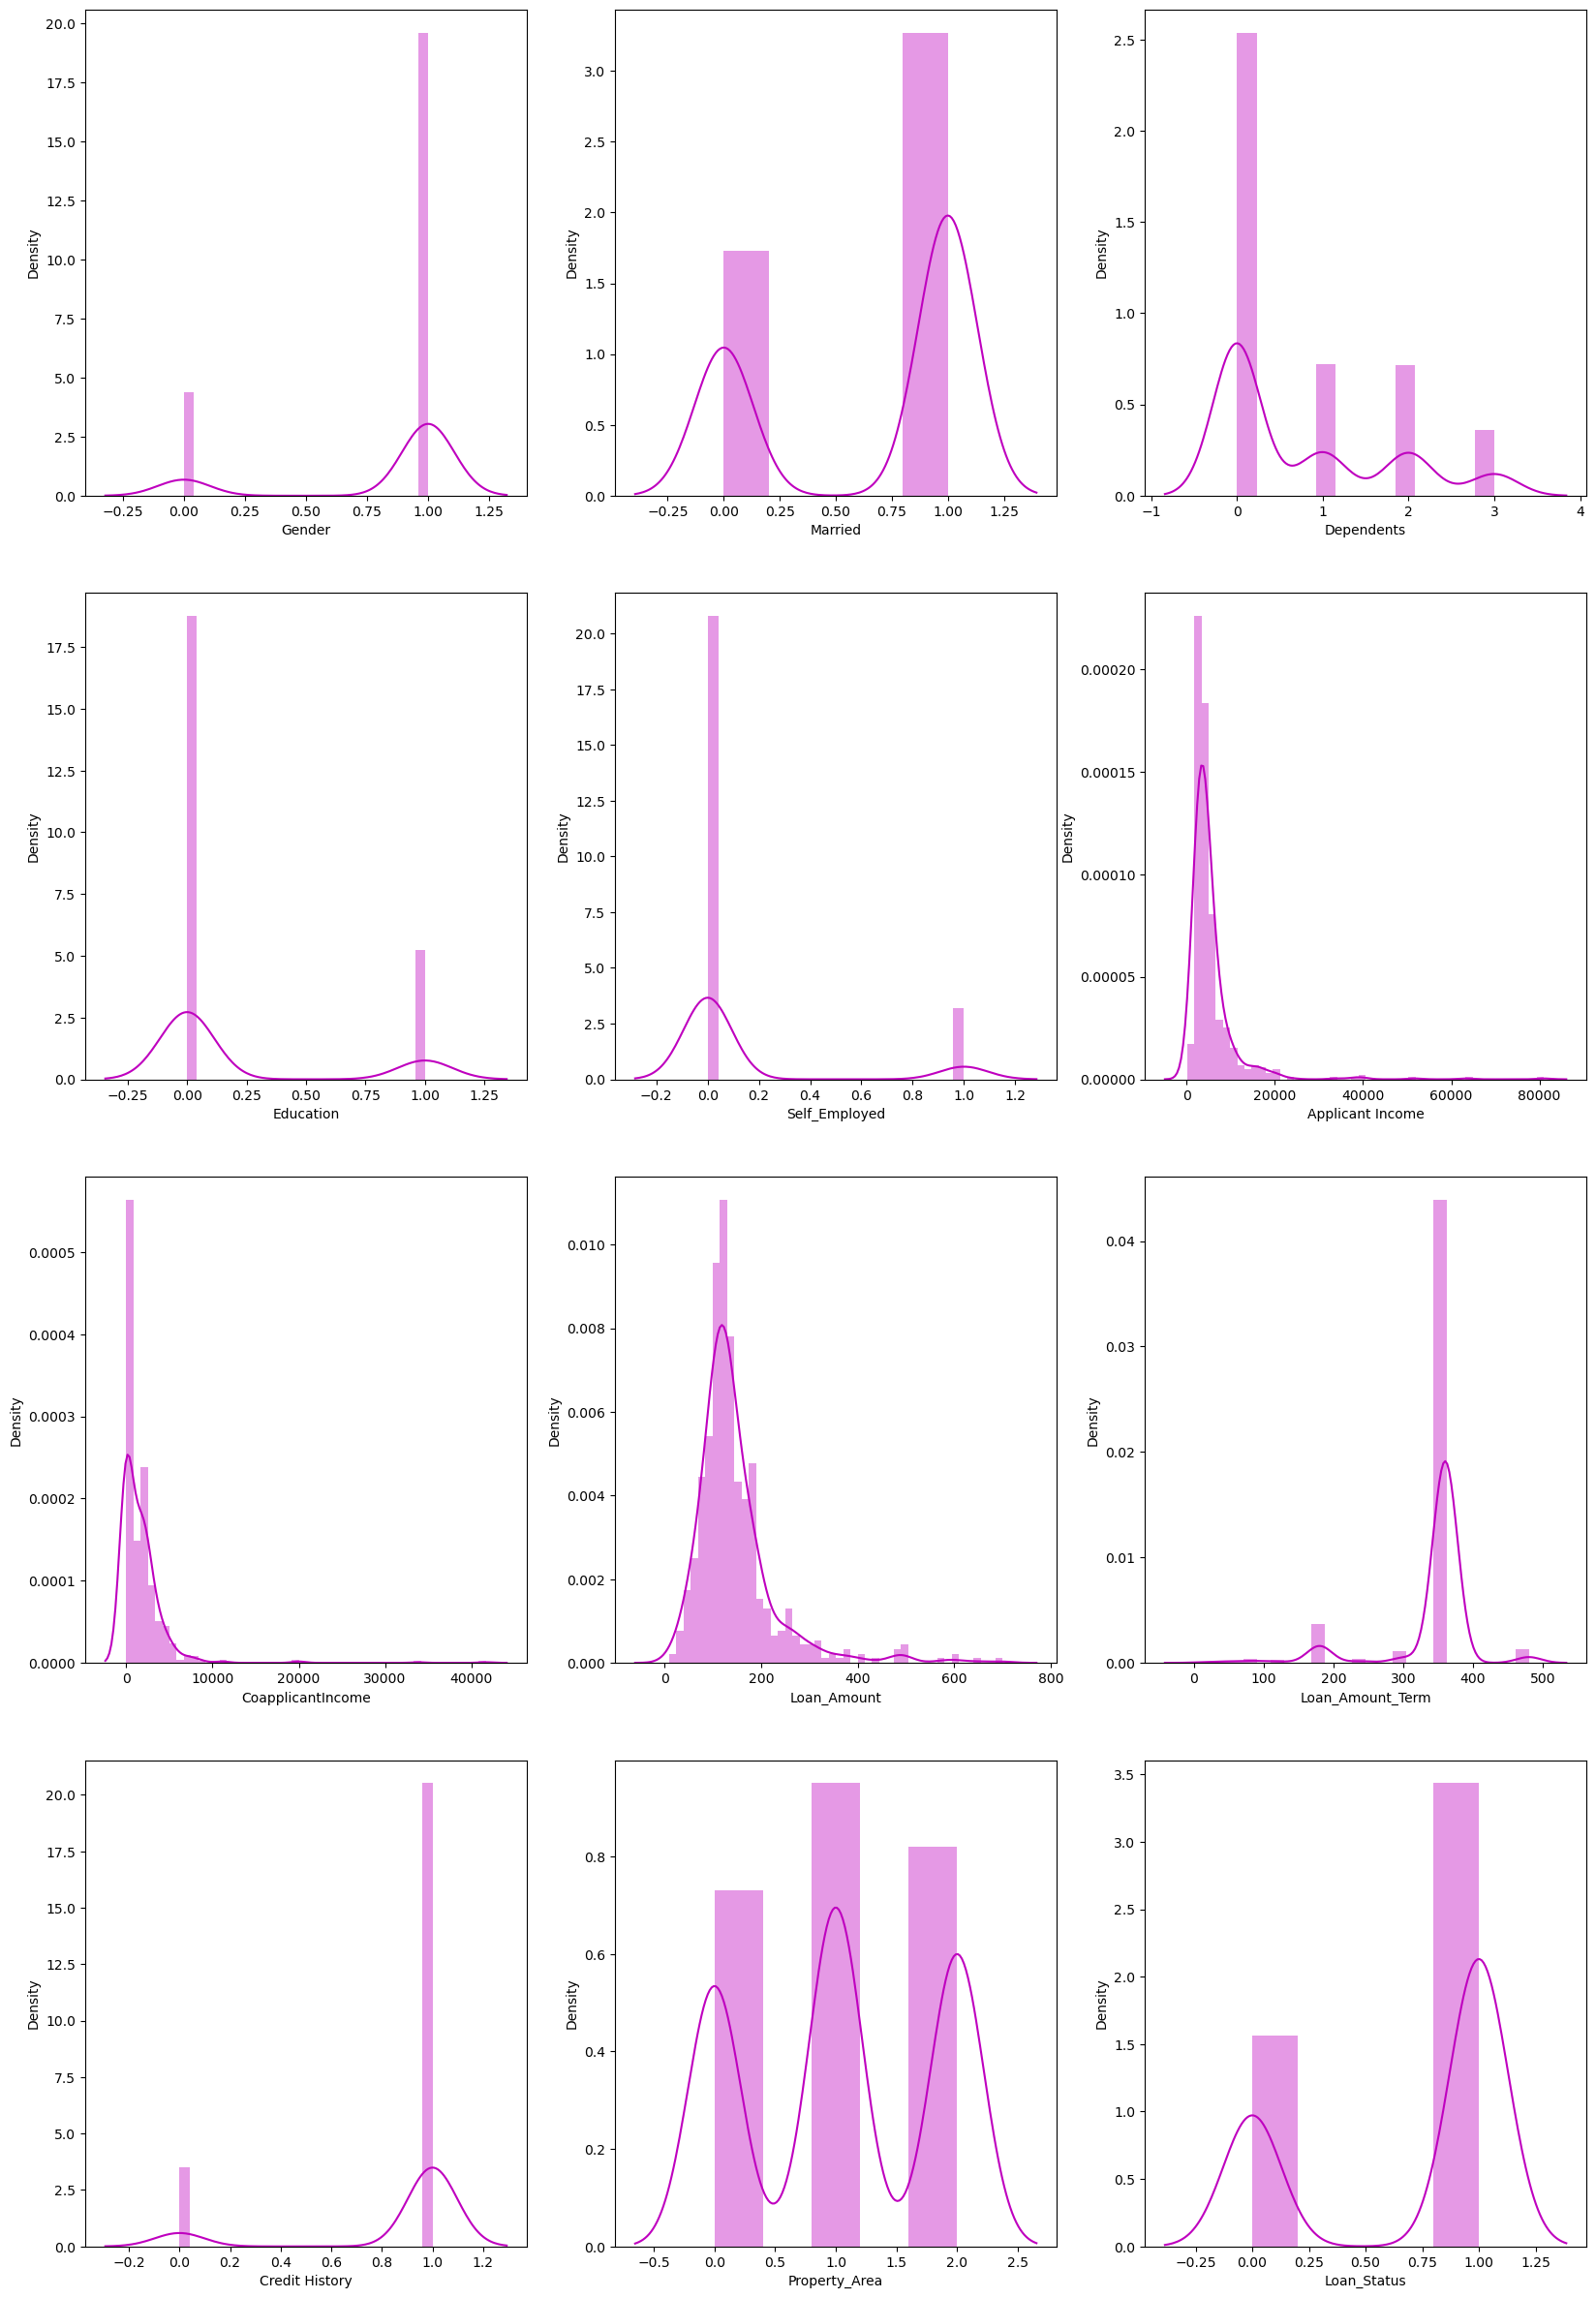

In [37]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

In [38]:
data.skew()

Gender              -1.646215
Married             -0.649810
Dependents           1.013119
Education            1.365098
Self_Employed        2.157034
Applicant Income     6.534654
CoapplicantIncome    7.488653
Loan_Amount          2.742358
Loan_Amount_Term    -2.399297
Credit History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

Check the skewness 

In [39]:
data['Dependents']=np.sqrt(data['Dependents'])
data['Education']=np.sqrt(data['Education'])
data['Self_Employed']=np.sqrt(data['Self_Employed'])
data['Applicant Income']=np.sqrt(data['Applicant Income'])
data['CoapplicantIncome']=np.sqrt(data['CoapplicantIncome'])
data['Loan_Amount']=np.sqrt(data['Loan_Amount'])

Remove the skewness

In [40]:
data.skew()

Gender              -1.646215
Married             -0.649810
Dependents           0.565157
Education            1.365098
Self_Employed        2.157034
Applicant Income     2.966953
CoapplicantIncome    0.977750
Loan_Amount          1.349447
Loan_Amount_Term    -2.399297
Credit History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

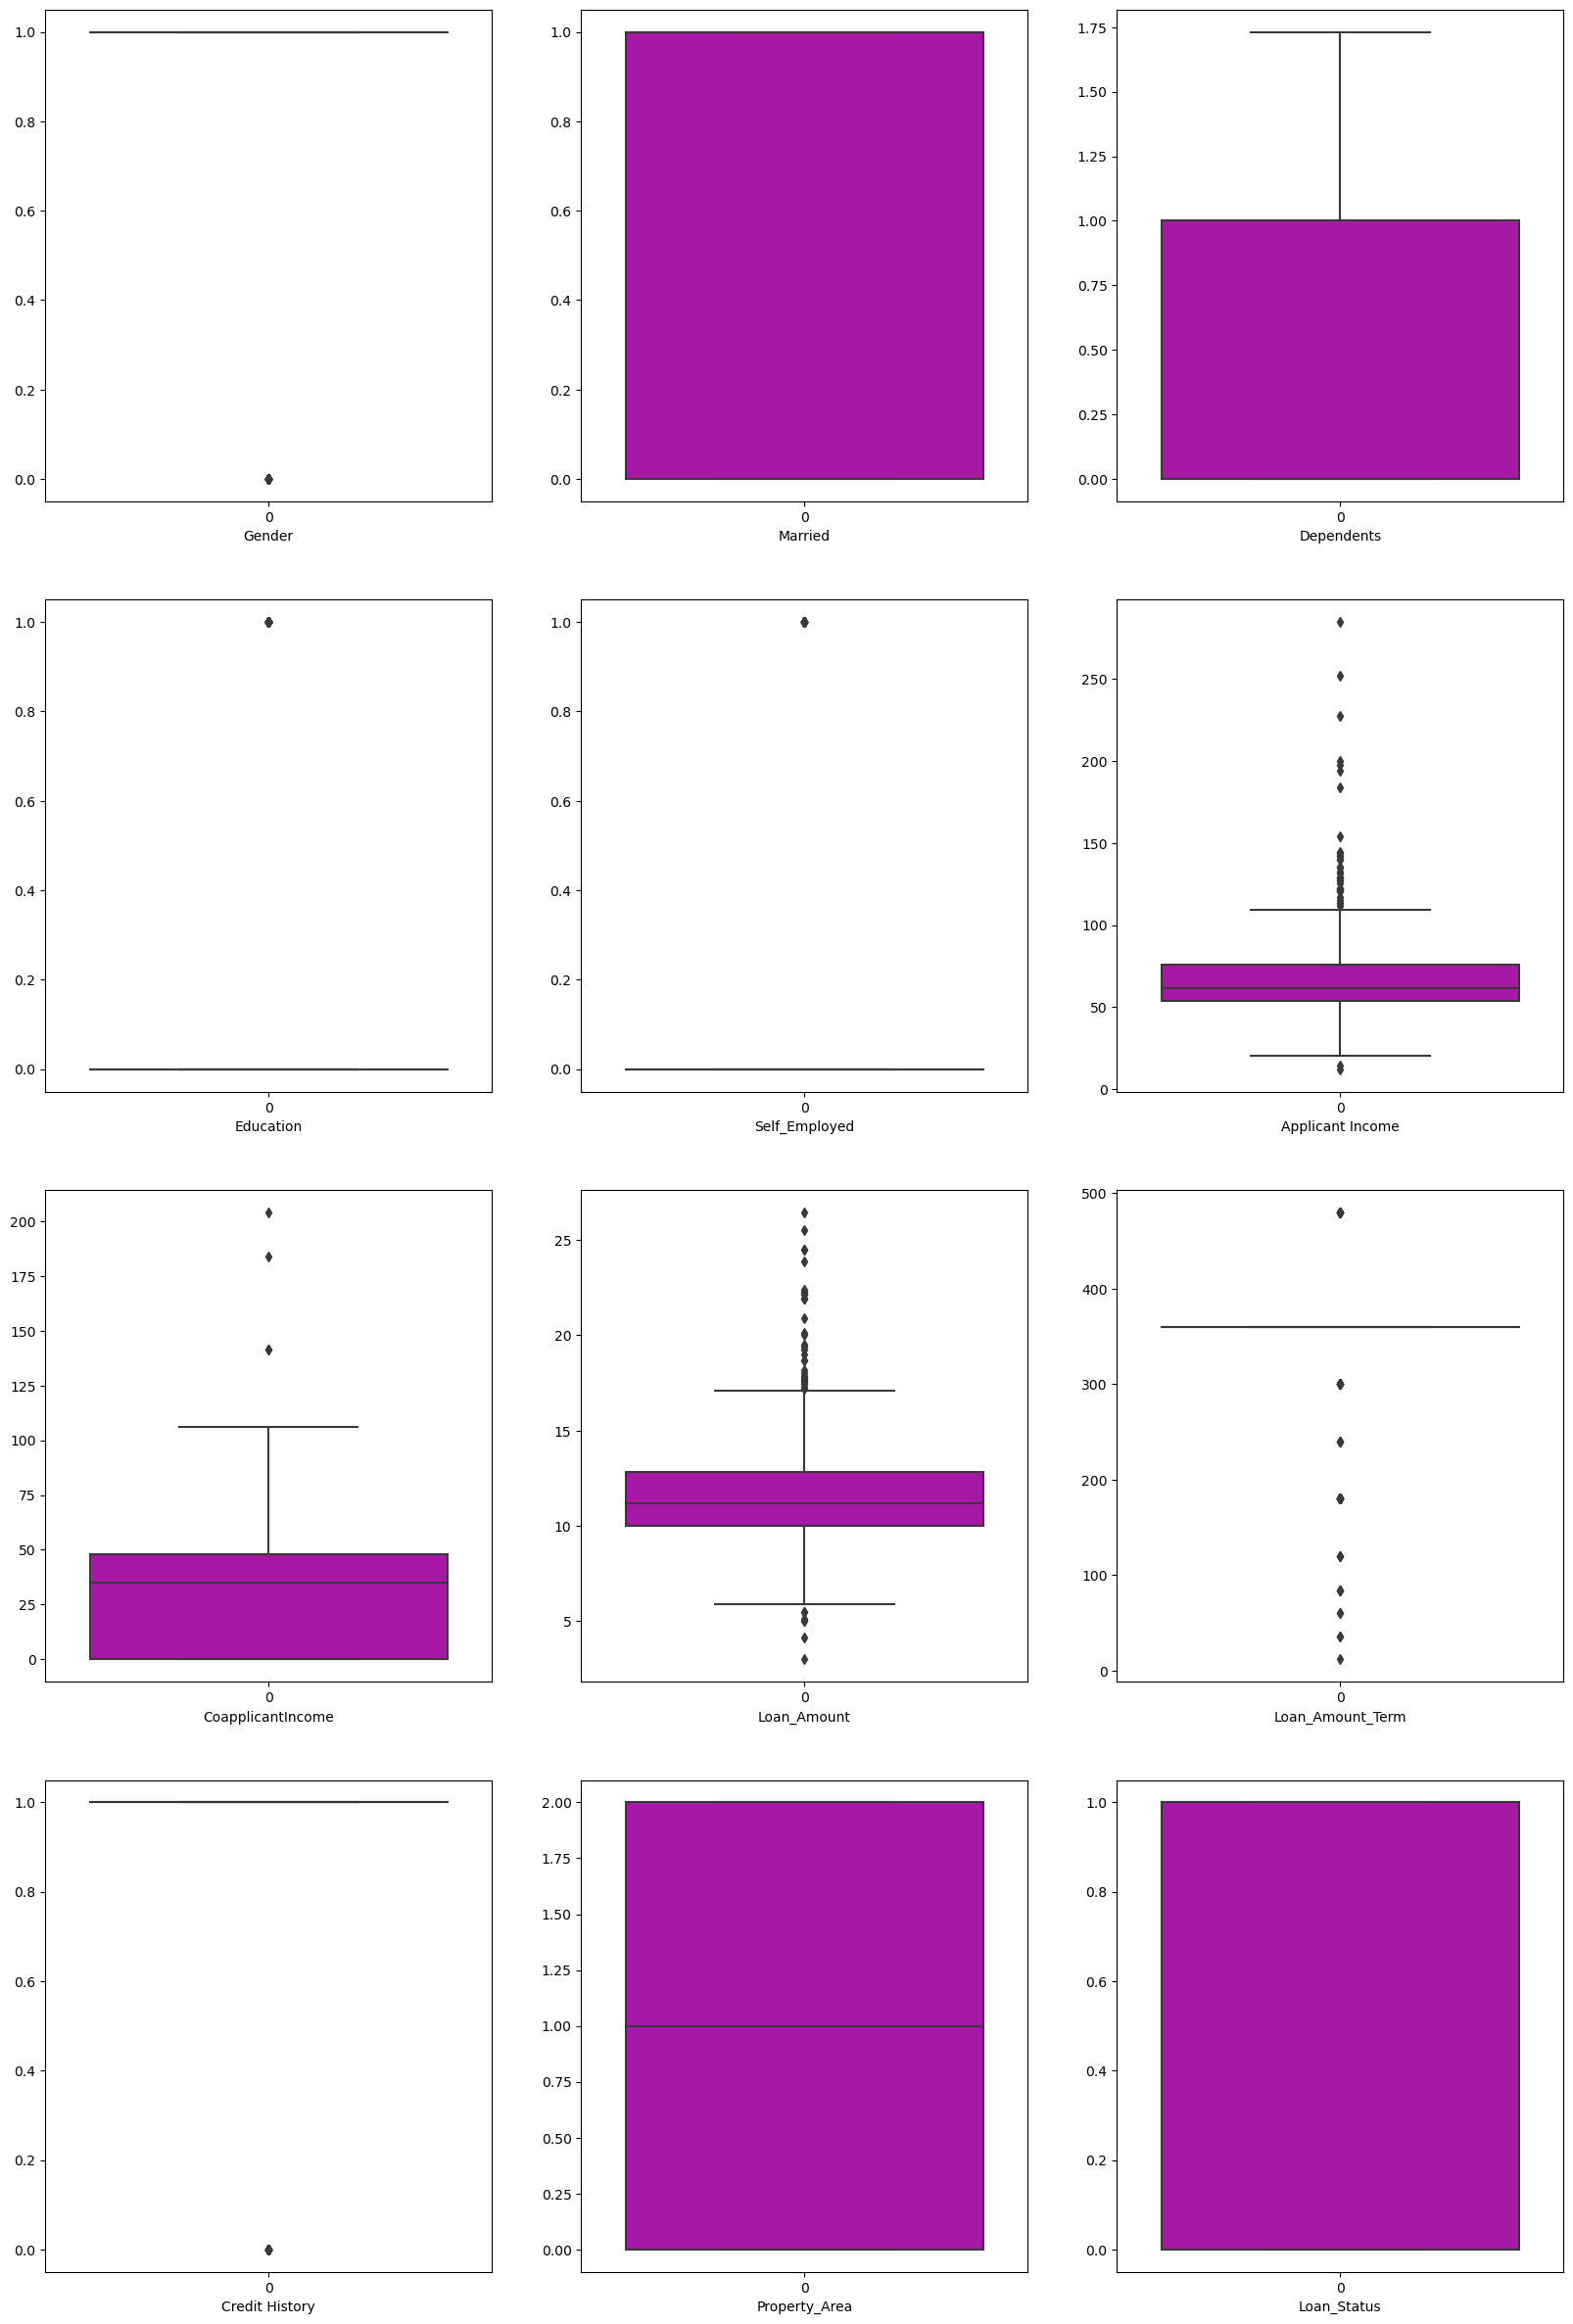

In [41]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

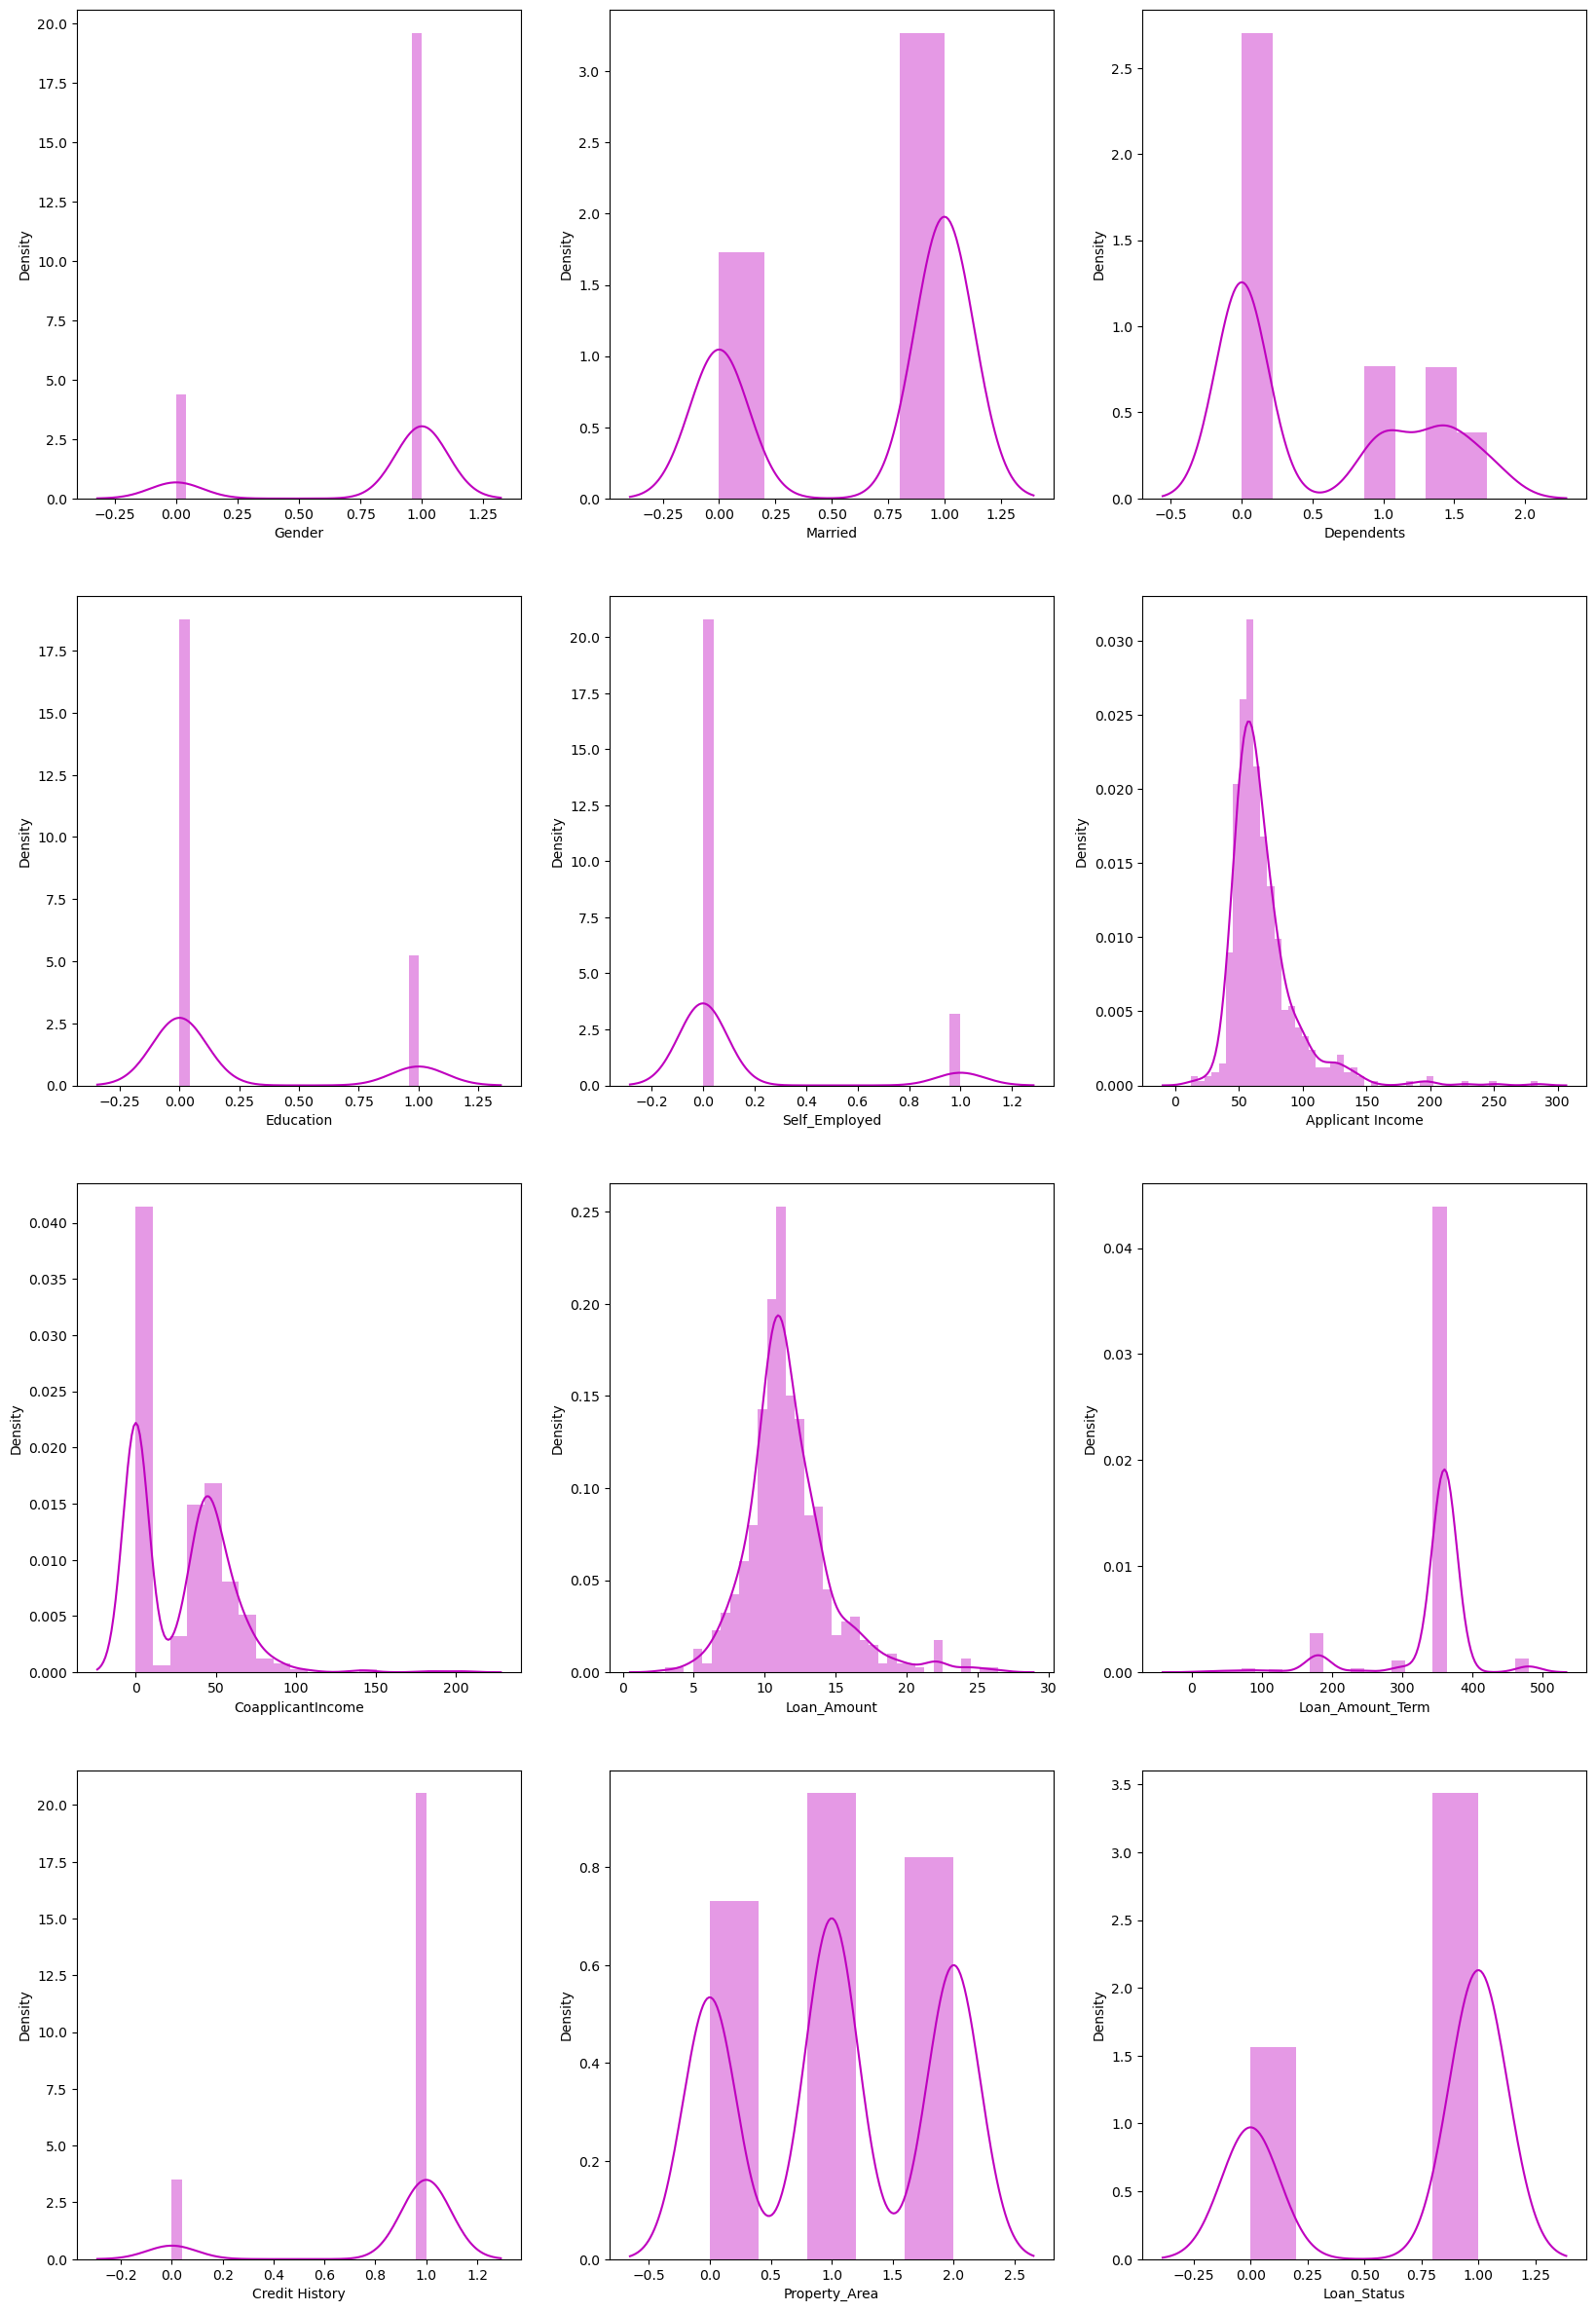

In [42]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for col in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color="m")
        plt.xlabel(col, fontsize=10)
    plotnumber+=1
plt.show()

In [43]:
X = data.drop('Loan_Status',axis=1)
Y = data['Loan_Status']

In [44]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,1.0,1.0,1.000000,0.0,0.0,67.697858,38.832976,11.313708,360.0,1.0,0.0
1,1.0,1.0,0.000000,0.0,1.0,54.772256,0.000000,8.124038,360.0,1.0,2.0
2,1.0,1.0,0.000000,1.0,0.0,50.823223,48.559242,10.954451,360.0,1.0,2.0
3,1.0,0.0,0.000000,0.0,0.0,77.459667,0.000000,11.874342,360.0,1.0,2.0
4,1.0,1.0,1.414214,0.0,1.0,73.600272,64.776539,16.340135,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
608,0.0,0.0,0.000000,0.0,0.0,53.851648,0.000000,8.426150,360.0,1.0,0.0
609,1.0,1.0,1.732051,0.0,0.0,64.078077,0.000000,6.324555,180.0,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,89.844310,15.491933,15.905974,360.0,1.0,2.0
611,1.0,1.0,1.414214,0.0,0.0,87.080423,0.000000,13.674794,360.0,1.0,2.0


In [45]:
Y

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
608    1.0
609    1.0
610    1.0
611    1.0
612    0.0
Name: Loan_Status, Length: 613, dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.472814,0.727103,0.680413,-0.528913,-0.392970,-0.029486,0.372648,-0.123544,0.273471,0.412125,-1.317053
1,0.472814,0.727103,-0.810111,-0.528913,2.544722,-0.513707,-0.969642,-1.187423,0.273471,0.412125,1.225793
2,0.472814,0.727103,-0.810111,1.890668,-0.392970,-0.661647,0.708843,-0.243370,0.273471,0.412125,1.225793
3,0.472814,-1.375322,-0.810111,-0.528913,-0.392970,0.336213,-0.969642,0.063450,0.273471,0.412125,1.225793
4,0.472814,0.727103,1.297808,-0.528913,2.544722,0.191632,1.269405,1.552966,0.273471,0.412125,1.225793
...,...,...,...,...,...,...,...,...,...,...,...
608,-2.114997,-1.375322,-0.810111,-0.528913,-0.392970,-0.548195,-0.969642,-1.086658,0.273471,0.412125,-1.317053
609,0.472814,0.727103,1.771552,-0.528913,-0.392970,-0.165091,-0.969642,-1.787622,-2.520488,0.412125,-1.317053
610,0.472814,0.727103,0.680413,-0.528913,-0.392970,0.800170,-0.434152,1.408157,0.273471,0.412125,1.225793
611,0.472814,0.727103,1.297808,-0.528913,-0.392970,0.696628,-0.969642,0.663971,0.273471,0.412125,1.225793


Scaled the data using StandardScaler 

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,1.191101,Gender
1,1.348522,Married
2,1.192822,Dependents
3,1.069365,Education
4,1.039248,Self_Employed
5,2.010578,Applicant Income
6,1.443115,CoapplicantIncome
7,1.912018,Loan_Amount
8,1.050867,Loan_Amount_Term
9,1.007338,Credit History


In [50]:
Y.value_counts()

1.0    421
0.0    192
Name: Loan_Status, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
SM = SMOTE()
X1, Y1 = SM.fit_resample(X,Y)

Here resample the data using SMOTE method

In [53]:
Y1.value_counts()

0.0    421
1.0    421
Name: Loan_Status, dtype: int64

Finding the best random_state

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is ", maxAcc, "at random_state", maxRS)

Best accuracy is  0.8804347826086957 at random_state 39


Create train test split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=maxRS)

# Classification Model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# LogisticRegression

In [58]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8804347826086957
[[ 32  19]
 [  3 130]]
              precision    recall  f1-score   support

         0.0       0.91      0.63      0.74        51
         1.0       0.87      0.98      0.92       133

    accuracy                           0.88       184
   macro avg       0.89      0.80      0.83       184
weighted avg       0.88      0.88      0.87       184



The accurracy for this model is 88 % score using LogisticRegression

# RandomForestClassifier

In [59]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8315217391304348
[[ 33  18]
 [ 13 120]]
              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68        51
         1.0       0.87      0.90      0.89       133

    accuracy                           0.83       184
   macro avg       0.79      0.77      0.78       184
weighted avg       0.83      0.83      0.83       184



The accurracy for this model is 83 % score using RandomForestClassifier

# SVC

In [60]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8695652173913043
[[ 31  20]
 [  4 129]]
              precision    recall  f1-score   support

         0.0       0.89      0.61      0.72        51
         1.0       0.87      0.97      0.91       133

    accuracy                           0.87       184
   macro avg       0.88      0.79      0.82       184
weighted avg       0.87      0.87      0.86       184



The accurracy for this model is 86 % score using SVC

# GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred = gbc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8532608695652174
[[ 35  16]
 [ 11 122]]
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72        51
         1.0       0.88      0.92      0.90       133

    accuracy                           0.85       184
   macro avg       0.82      0.80      0.81       184
weighted avg       0.85      0.85      0.85       184



The accurracy for this model is 85 % score using GradientBoostingClassifier

# AdaBoostClassifier

In [62]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
pred = ab.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8586956521739131
[[ 34  17]
 [  9 124]]
              precision    recall  f1-score   support

         0.0       0.79      0.67      0.72        51
         1.0       0.88      0.93      0.91       133

    accuracy                           0.86       184
   macro avg       0.84      0.80      0.81       184
weighted avg       0.85      0.86      0.85       184



The accurracy for this model is 85 % score using AdaBoostClassifier

# BaggingClassifier

In [63]:
bc = BaggingClassifier()
bc.fit(x_train, y_train)
pred = bc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7771739130434783
[[ 37  14]
 [ 27 106]]
              precision    recall  f1-score   support

         0.0       0.58      0.73      0.64        51
         1.0       0.88      0.80      0.84       133

    accuracy                           0.78       184
   macro avg       0.73      0.76      0.74       184
weighted avg       0.80      0.78      0.78       184



The accurracy for this model is 77 % score using AdaBoostClassifier

# KNeighborsClassifier

In [64]:
knn = KNN()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8206521739130435
[[ 30  21]
 [ 12 121]]
              precision    recall  f1-score   support

         0.0       0.71      0.59      0.65        51
         1.0       0.85      0.91      0.88       133

    accuracy                           0.82       184
   macro avg       0.78      0.75      0.76       184
weighted avg       0.81      0.82      0.81       184



The accurracy for this model is 82 % score using KNN

# DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7282608695652174
[[ 34  17]
 [ 33 100]]
              precision    recall  f1-score   support

         0.0       0.51      0.67      0.58        51
         1.0       0.85      0.75      0.80       133

    accuracy                           0.73       184
   macro avg       0.68      0.71      0.69       184
weighted avg       0.76      0.73      0.74       184



The accurracy for this model is 72 % score using AdaBoostClassifier

# ExtraTreesClassifier

In [66]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred = etc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.8043478260869565
[[ 35  16]
 [ 20 113]]
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66        51
         1.0       0.88      0.85      0.86       133

    accuracy                           0.80       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.81      0.80      0.81       184



The accurracy for this model is 80 % score using ExtraTreesClassifier

In [67]:
score = cross_val_score(LR, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.68047337 0.71005917 0.67857143 0.67857143 0.625     ]
0.6745350803043111
Difference between accuracy score and cross validation score is - 0.12981274578264546


In [68]:
score = cross_val_score(RF, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.77514793 0.75739645 0.80952381 0.85119048 0.89285714]
0.8172231614539308
Difference between accuracy score and cross validation score is - -0.012875335366974272


In [69]:
score = cross_val_score(svc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.71005917 0.73372781 0.72619048 0.73809524 0.69047619]
0.7197097774020851
Difference between accuracy score and cross validation score is - 0.08463804868487146


In [70]:
score = cross_val_score(gbc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.68639053 0.69230769 0.82142857 0.80952381 0.79761905]
0.7614539306846998
Difference between accuracy score and cross validation score is - 0.04289389540225674


In [71]:
score = cross_val_score(ab, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.69230769 0.70414201 0.73214286 0.76190476 0.7202381 ]
0.7221470836855453
Difference between accuracy score and cross validation score is - 0.08220074240141129


In [72]:
score = cross_val_score(bc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.73372781 0.75147929 0.80357143 0.82142857 0.8452381 ]
0.7910890391659622
Difference between accuracy score and cross validation score is - 0.013258786920994359


In [73]:
score = cross_val_score(dtc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.69230769 0.71005917 0.79761905 0.75       0.83928571]
0.7578543251620176
Difference between accuracy score and cross validation score is - 0.04649350092493898


In [74]:
score = cross_val_score(etc, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.82840237 0.80473373 0.875      0.85119048 0.92261905]
0.8563891236968161
Difference between accuracy score and cross validation score is - -0.05204129760985954


In [75]:
score = cross_val_score(knn, X1, Y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is -",accuracy_score(y_test, pred)- score.mean())

[0.72189349 0.71005917 0.74404762 0.74404762 0.76190476]
0.7363905325443787
Difference between accuracy score and cross validation score is - 0.06795729354257785


From the difference of both R2 score and cross validation score computed on R2 score we can conclude that ExtraTreesClassifier  as our best finding and best performing model.

# Hyperparameter tuning

Hyperparameter tuning using best model 

In [76]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
             'random_state':[10,50,300,800,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,150,200]}

In [77]:
etc = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [78]:
etc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 150, 200],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 300, 800, 1000]})

In [79]:
etc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

we take the parameter which is model predicted

In [80]:
model = ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=50, n_jobs=-2, random_state=50)

In [81]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

85.32608695652173


# Save the model

In [82]:
import pickle
filename='Loan_prediction.pkl'
pickle.dump(model,open(filename,'wb'))

# Predicting the saved model

In [83]:
load = pickle.load(open('Loan_prediction.pkl','rb'))
result = load.score(x_test, y_test)
print(result*100)

85.32608695652173


In [84]:
conclusion = pd.DataFrame([load.predict(x_test)[:], y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
predicted,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
original,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


steps:- first import the necessary libraries
Then read the data , Then perform the EDA preprocessing, feature engineering , then split the data into two parts first is target and one is features variables, then train and test the data using train test split, then build the different different models , and then check the performance of different different model, then check the cross validation score of different different model then find the best models in all the models then do hyperparameter tuning for choosing the best then save the model 